<a href="https://colab.research.google.com/github/Sf99-lab/Exploratory-Data-Analysis-EDA-/blob/main/BRAIN_TUMOR_STAGE_BASED_RECURRENCE_PATTERNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Anlaysis

# install Packages

In [1]:
!pip install catboost skimpy
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.9 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 23.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# Import Drive Folder

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Packages for Data Analysis

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.mosaicplot as mosaic

# Load Data

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/BrainTumor.csv')
data.head()

,Patient ID,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site,Survival Time (months)
0,1,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe,18
1,2,55,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,NaN,NaN,36
2,3,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe,22
3,4,50,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response,NaN,NaN,12
4,5,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,24.0,Frontal lobe,48


In [8]:
df = data.copy()

# Check Data Types

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient ID                   2000 non-null   int64  
 1   Age                          2000 non-null   int64  
 2   Gender                       2000 non-null   object 
 3   Tumor Type                   2000 non-null   object 
 4   Tumor Grade                  2000 non-null   object 
 5   Tumor Location               2000 non-null   object 
 6   Treatment                    2000 non-null   object 
 7   Treatment Outcome            2000 non-null   object 
 8   Time to Recurrence (months)  1438 non-null   float64
 9   Recurrence Site              1438 non-null   object 
 10  Survival Time (months)       2000 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 172.0+ KB


# Check for missing and duplicated values

In [ ]:
print(data.isnull().sum())
print(data.duplicated().sum())
print(data['Patient ID'].duplicated().sum())

Patient ID                       0
Age                              0
Gender                           0
Tumor Type                       0
Tumor Grade                      0
Tumor Location                   0
Treatment                        0
Treatment Outcome                0
Time to Recurrence (months)    562
Recurrence Site                562
Survival Time (months)           0
dtype: int64
0
0


# Fill in missing data appropriately

Mean and median is close so choose median since it is more robust

In [ ]:
data['Time to Recurrence (months)'].fillna(data['Time to Recurrence (months)'].median(), inplace=True)
data['Recurrence Site'].fillna('Unknown', inplace=True)

In [ ]:
data.describe()

,Patient ID,Age,Time to Recurrence (months),Survival Time (months)
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,56.153000,16.071500,34.270000
std,577.494589,6.078492,2.652717,8.606343
min,1.000000,42.000000,6.000000,9.000000
25%,500.750000,51.000000,14.000000,28.000000
50%,1000.500000,56.000000,16.000000,36.000000
75%,1500.250000,61.000000,18.000000,42.000000
max,2000.000000,72.000000,36.000000,72.000000


# Summarize Data

In [ ]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2000   │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 11     │ │ int64       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA   ┃ NA %  ┃ mean    ┃ sd     ┃ p0  ┃ p25    ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Patient ID               │    0 │     0 │    1000 │  577.5 │   1 │  500.8 │  1000 │  1500 │  2000 │ ▇▇▇▇▇▇ │  │
│ │ Age                      │    0 │     0 │   56.15 │  6.078 │  42 │     51 │    56 │    61 │    72 │ ▁▆▇▇▅▁ │  │
│ │ Time to Recurrence       │  562 │  28.1 │    16.1 │  3.128 │   6 │     14 │    16 │    18 │    36 │   ▅▇   │  │
│ │ (months)                 │      │       │         │        │     │        │       │       │       │        │  │
│ │ Survival Time (months)   │    0 │     0 │   34.27 │  8.606 │   9 │     28 │    36 │    42 │    72 │  ▁▃▇▅  │  │
│ └──────────────────────────┴──────┴───────┴─────────┴────────┴─────┴────────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                       ┃ NA      ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                            │       0 │         0 │                         1 │                 2000 │  │
│ │ Tumor Type                        │       0 │         0 │                         1 │                 2000 │  │
│ │ Tumor Grade                       │       0 │         0 │                         1 │                 2000 │  │
│ │ Tumor Location                    │       0 │         0 │                         2 │                 4000 │  │
│ │ Treatment                         │       0 │         0 │                       2.7 │                 5332 │  │
│ │ Treatment Outcome                 │       0 │         0 │                         2 │                 4000 │  │
│ │ Recurrence Site                   │     562 │      28.1 │                       1.4 │                 2876 │  │
│ └───────────────────────────────────┴─────────┴───────────┴───────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
object_columns = data.select_dtypes(include=['object']).columns

In [ ]:
print(object_columns)

Index(['Gender', 'Tumor Type', 'Tumor Grade', 'Tumor Location', 'Treatment',
       'Treatment Outcome', 'Recurrence Site'],
      dtype='object')


## **Univariate Analysis**

# Frequecy of each unique value for data columns

In [ ]:
for column_name in data.columns:
    # Step 3: Check if the column has dtype 'object'
    if data[column_name].dtype == 'object':
        # Step 4: Calculate value counts
        value_counts = data[column_name].value_counts()

        # Step 5: Output frequency and value in each column
        print("Column:", column_name)
        for value, freq in value_counts.items():
            print("Value:", value, "Frequency:", freq)
        print("------------------------------------------")

Column: Gender
Value: Female Frequency: 1007
Value: Male Frequency: 993
------------------------------------------
Column: Tumor Type
Value: Meningioma Frequency: 710
Value: Astrocytoma Frequency: 653
Value: Glioblastoma Frequency: 637
------------------------------------------
Column: Tumor Grade
Value: I Frequency: 710
Value: IV Frequency: 635
Value: II Frequency: 349
Value: III Frequency: 306
------------------------------------------
Column: Tumor Location
Value: Frontal lobe Frequency: 515
Value: Parietal lobe Frequency: 503
Value: Temporal lobe Frequency: 497
Value: Occipital lobe Frequency: 485
------------------------------------------
Column: Treatment
Value: Surgery + Radiation Frequency: 882
Value: Surgery + Chemotherapy Frequency: 779
Value: Surgery Frequency: 139
Value: Chemotherapy Frequency: 123
Value: Radiation Frequency: 73
Value: Surgery + Radiation therapy Frequency: 2
Value: Chemotherapy + Radiation Frequency: 2
------------------------------------------
Column: Tre

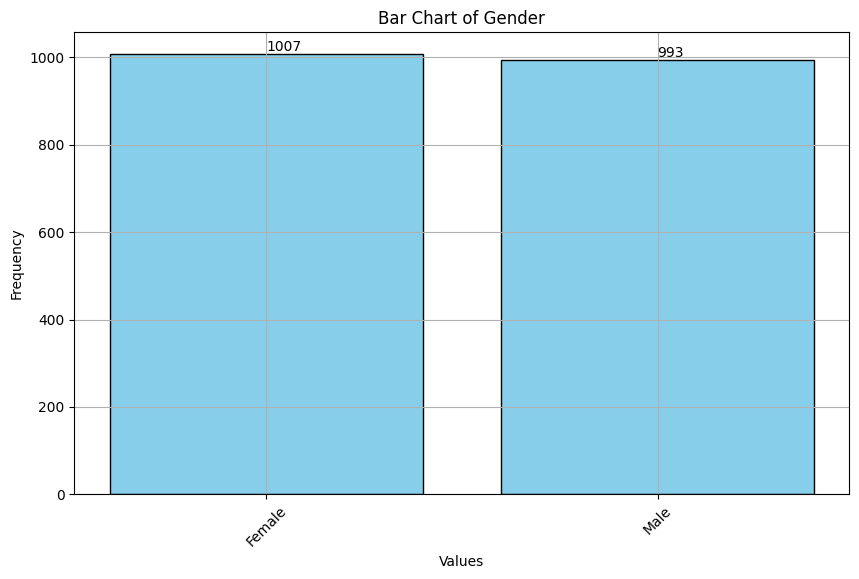

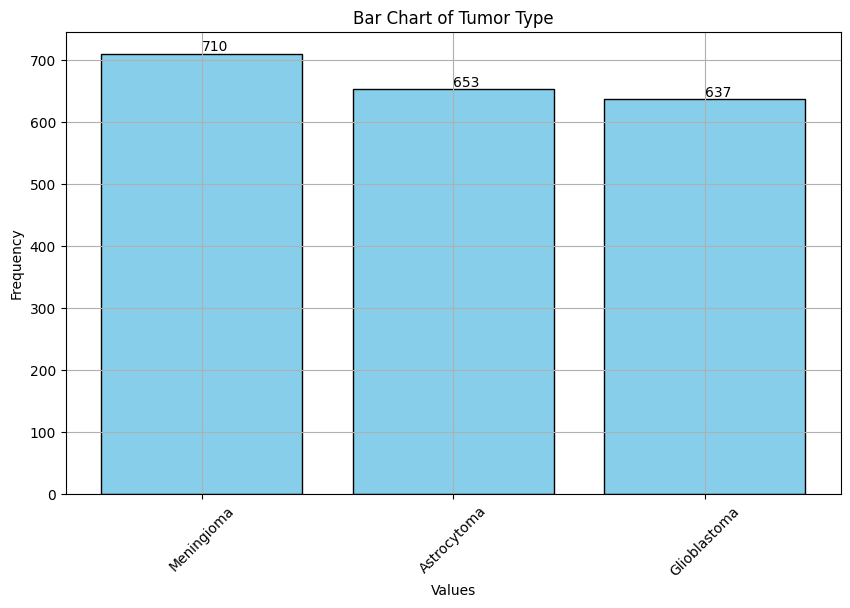

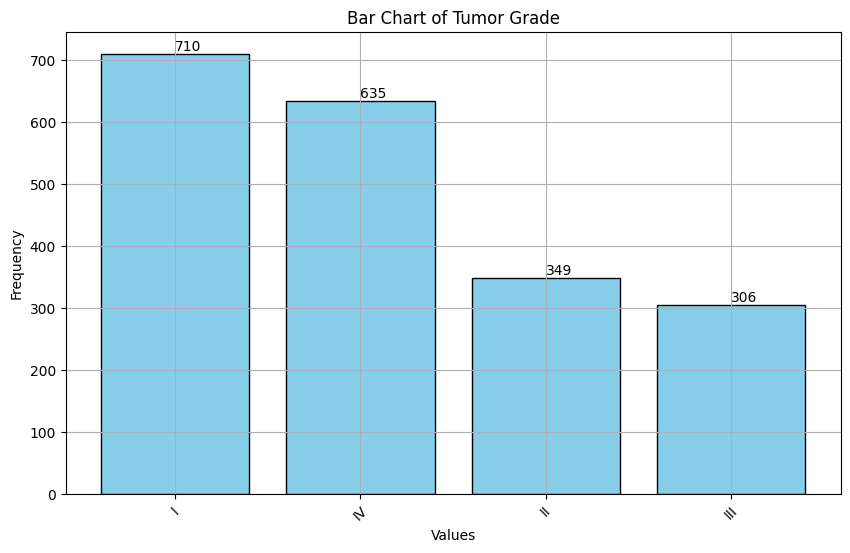

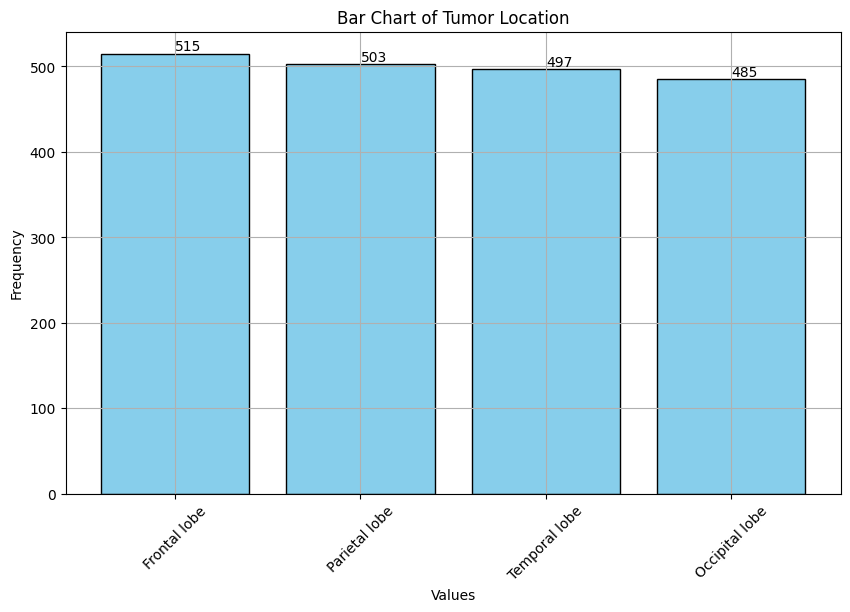

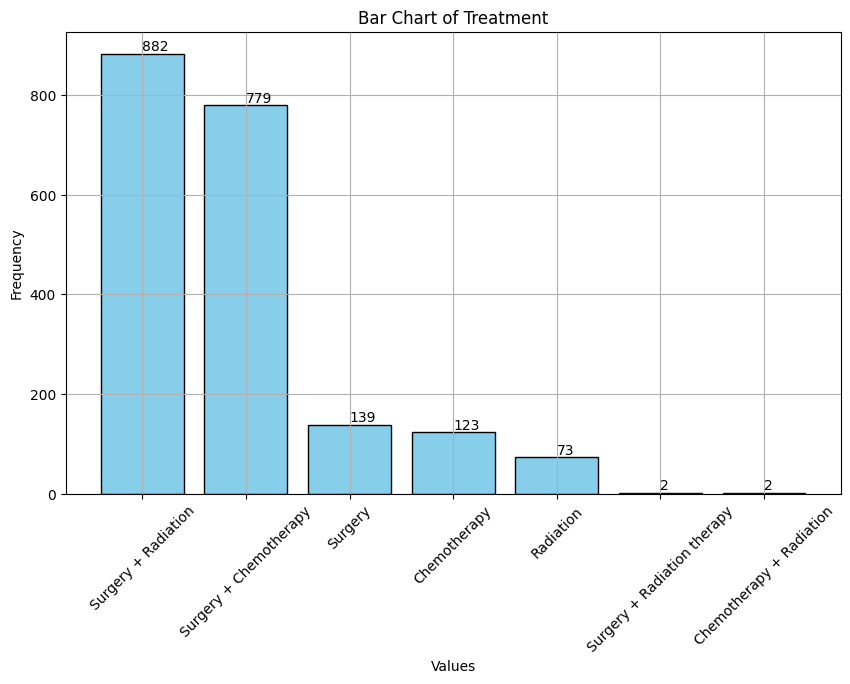

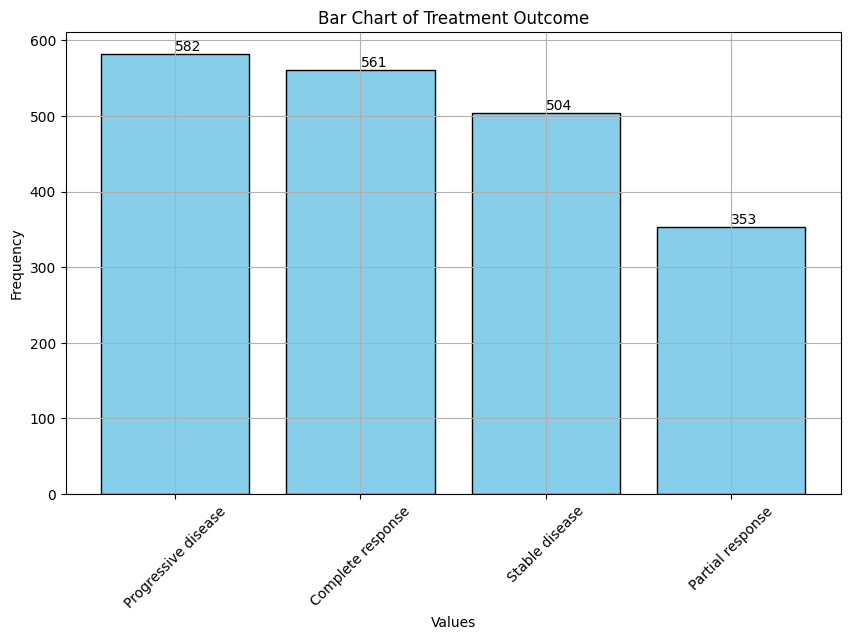

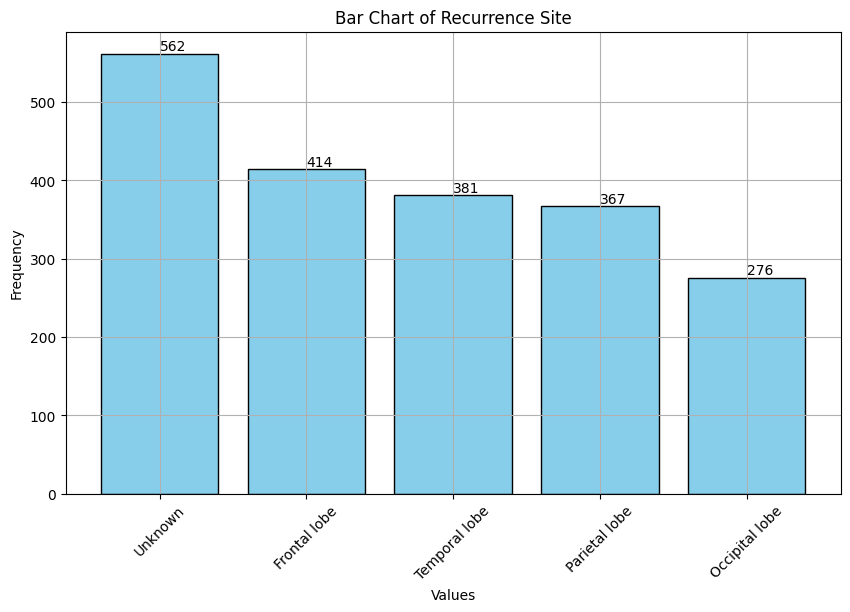

In [ ]:
for column_name in object_columns:
    value_counts = data[column_name].value_counts()
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    bars = plt.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Bar Chart of {}'.format(column_name))
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Annotate each bar with its corresponding value
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

    plt.grid(True)
    plt.show()

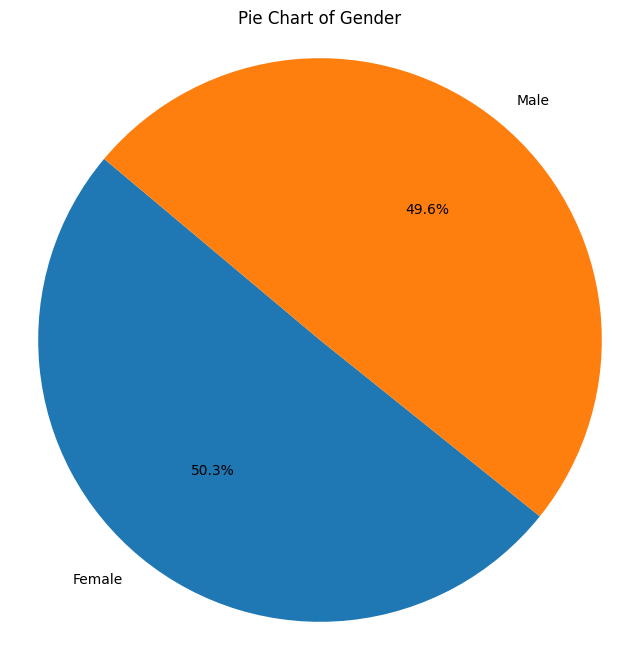

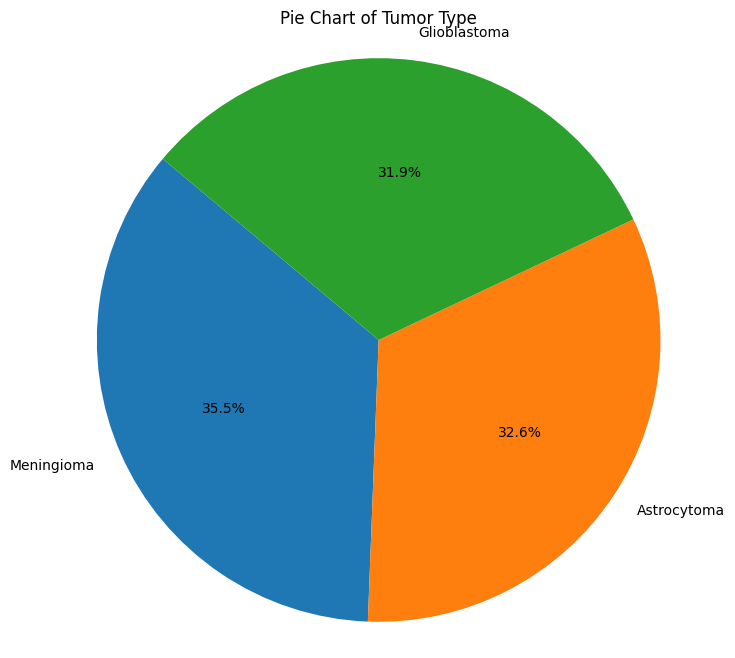

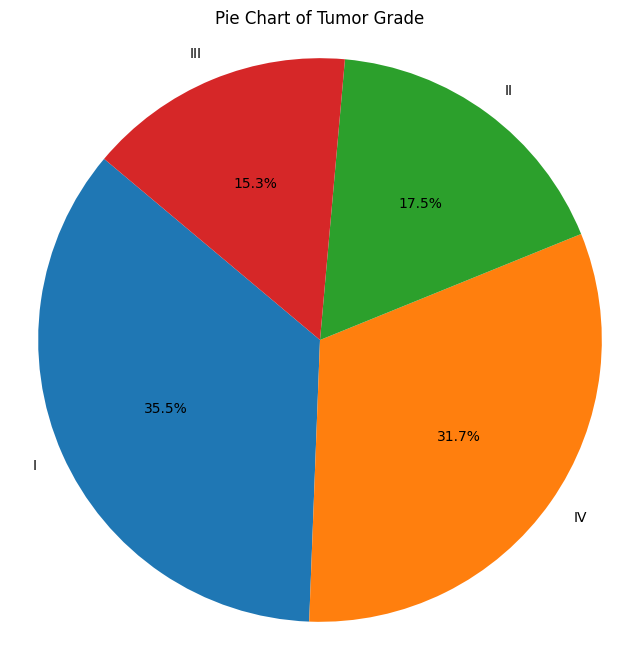

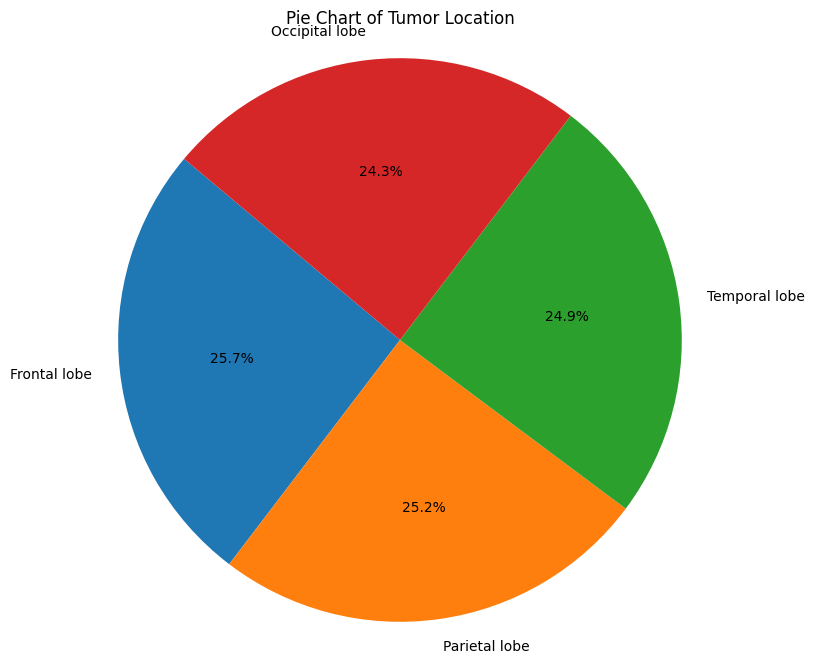

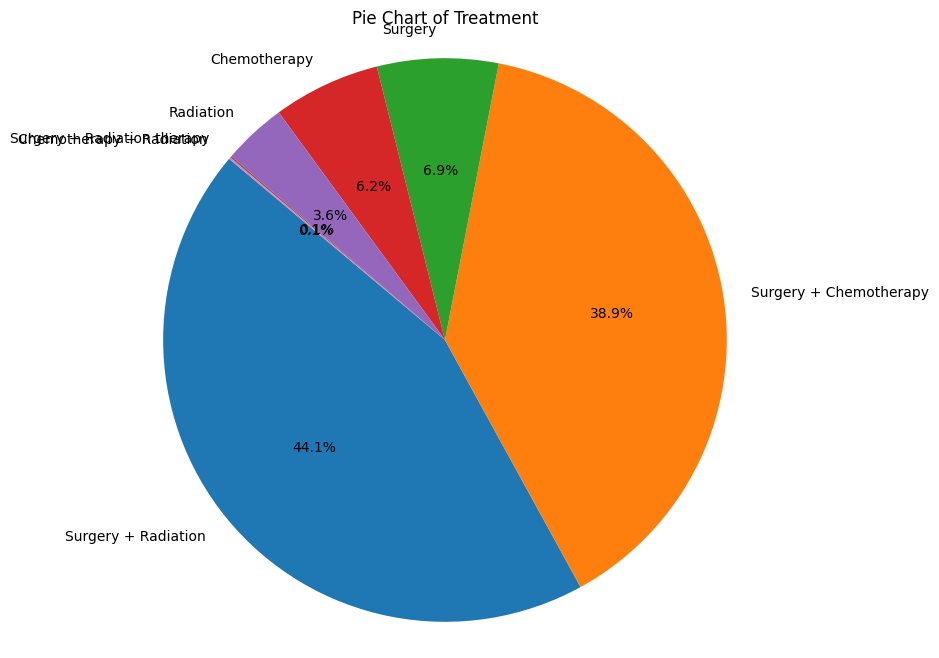

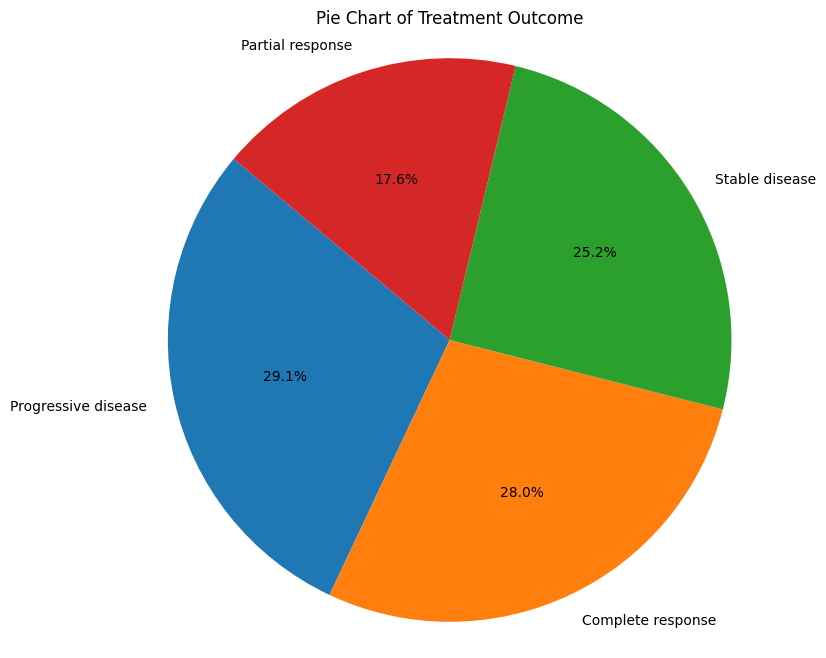

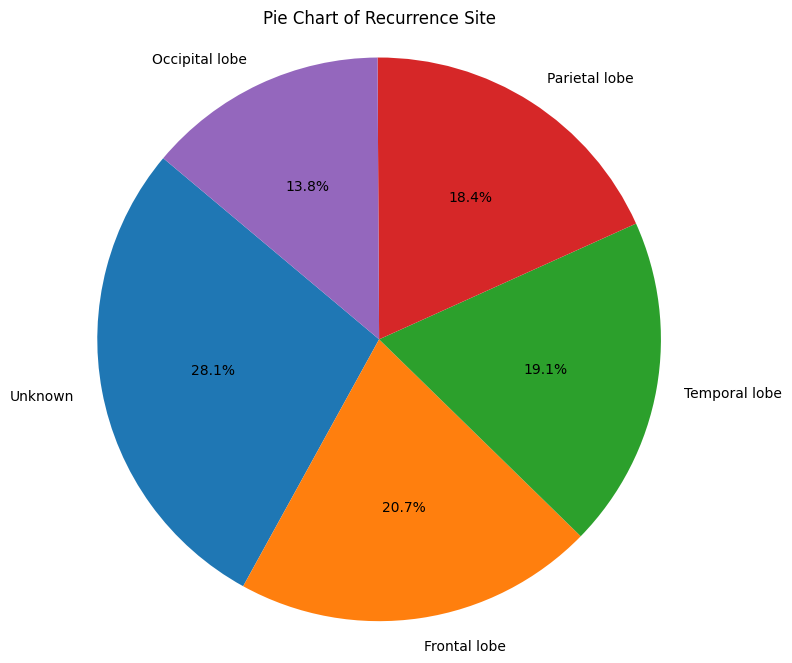

In [ ]:
for column_name in object_columns:
    value_counts = data[column_name].value_counts()
    plt.figure(figsize=(8, 8))  # Adjust the figure size if needed
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Pie Chart of {}'.format(column_name))
    plt.show()

In [ ]:
data.columns

Index(['Patient ID', 'Age', 'Gender', 'Tumor Type', 'Tumor Grade',
       'Tumor Location', 'Treatment', 'Treatment Outcome',
       'Time to Recurrence (months)', 'Recurrence Site',
       'Survival Time (months)'],
      dtype='object')

# Multivariate Check for important describing features for Survival Time and Time to reccurence

In [ ]:
summary_stats = data.groupby('Gender')['Survival Time (months)'].describe()
print("Time to Recurrence categorized by gender\n")
print(summary_stats)

Time to Recurrence categorized by gender

         count       mean       std   min   25%   50%   75%   max
Gender                                                           
Female  1007.0  33.443893  8.989644   9.0  28.0  36.0  42.0  72.0
Male     993.0  35.107754  8.118420  12.0  30.0  36.0  42.0  72.0


<Figure size 1000x600 with 0 Axes>

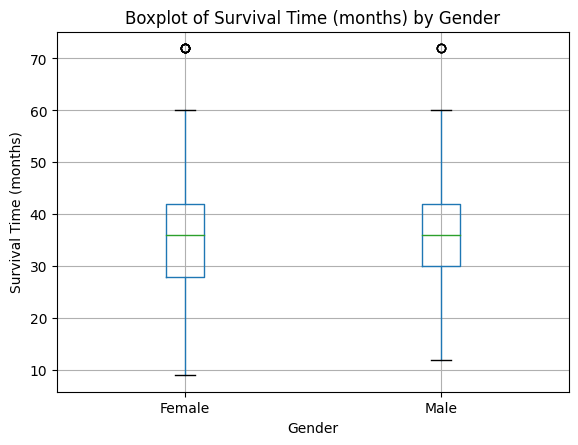

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
data.boxplot(column='Survival Time (months)', by='Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Time (months)')
plt.title('Boxplot of Survival Time (months) by Gender')
plt.suptitle('')  # Remove default title
plt.show()

In [ ]:
print("Time to Recurrence categorized by gender\n")
print(data.groupby('Tumor Grade')['Survival Time (months)'].describe())

Time to Recurrence categorized by gender

             count       mean       std   min   25%   50%   75%   max
Tumor Grade                                                          
I            710.0  37.473239  8.782515  24.0  30.0  36.0  42.0  72.0
II           349.0  34.452722  9.408432  14.0  28.0  36.0  42.0  72.0
III          306.0  32.352941  8.793791  12.0  24.0  36.0  42.0  48.0
IV           635.0  31.511811  6.371103   9.0  28.0  30.0  36.0  60.0


<Figure size 1000x600 with 0 Axes>

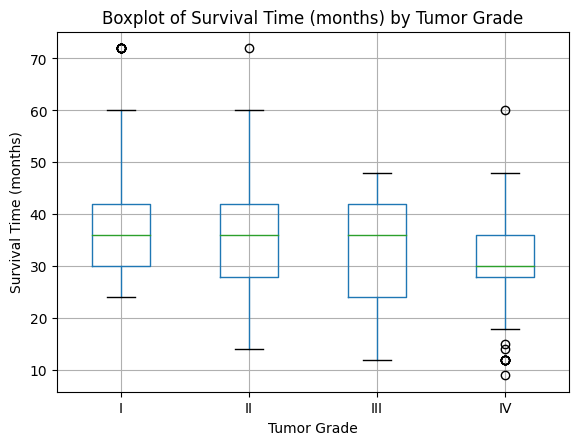

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
data.boxplot(column='Survival Time (months)', by='Tumor Grade')
plt.xlabel('Tumor Grade')
plt.ylabel('Survival Time (months)')
plt.title('Boxplot of Survival Time (months) by Tumor Grade')
plt.suptitle('')  # Remove default title
plt.show()

Survival Time (months) categorized by Treatment

                             count       mean        std   min   25%   50%  \
Treatment                                                                    
Chemotherapy                 123.0  35.821138   6.145814  26.0  32.0  38.0   
Chemotherapy + Radiation       2.0  32.000000   0.000000  32.0  32.0  32.0   
Radiation                     73.0  33.506849   5.970118  26.0  28.0  32.0   
Surgery                      139.0  37.050360   9.458777  14.0  28.0  42.0   
Surgery + Chemotherapy       779.0  32.983312   8.561045   9.0  24.0  32.0   
Surgery + Radiation          882.0  34.829932   8.775707  12.0  30.0  36.0   
Surgery + Radiation therapy    2.0  30.000000  25.455844  12.0  21.0  30.0   

                              75%   max  
Treatment                                
Chemotherapy                 44.0  44.0  
Chemotherapy + Radiation     32.0  32.0  
Radiation                    38.0  44.0  
Surgery                      42.0  72.

<Figure size 1000x600 with 0 Axes>

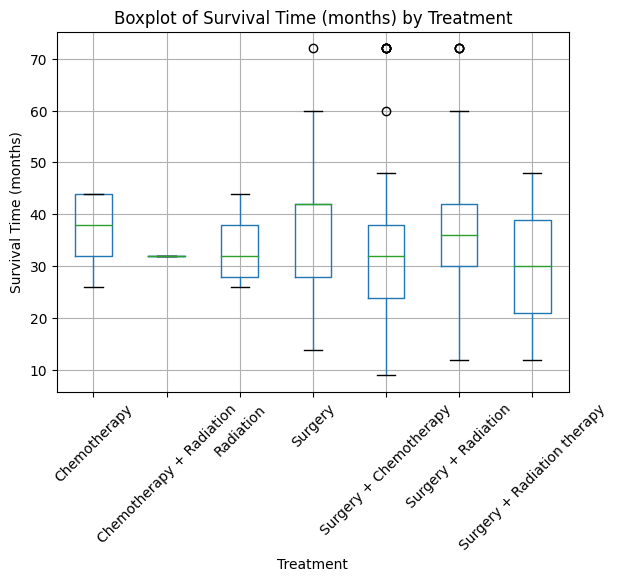

In [ ]:
print("Survival Time (months) categorized by Treatment\n")
print(data.groupby('Treatment')['Survival Time (months)'].describe())
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
data.boxplot(column='Survival Time (months)', by='Treatment')
plt.xlabel('Treatment')
plt.ylabel('Survival Time (months)')
plt.title('Boxplot of Survival Time (months) by Treatment')
plt.xticks(rotation=45)
plt.suptitle('')  # Remove default title
plt.show()

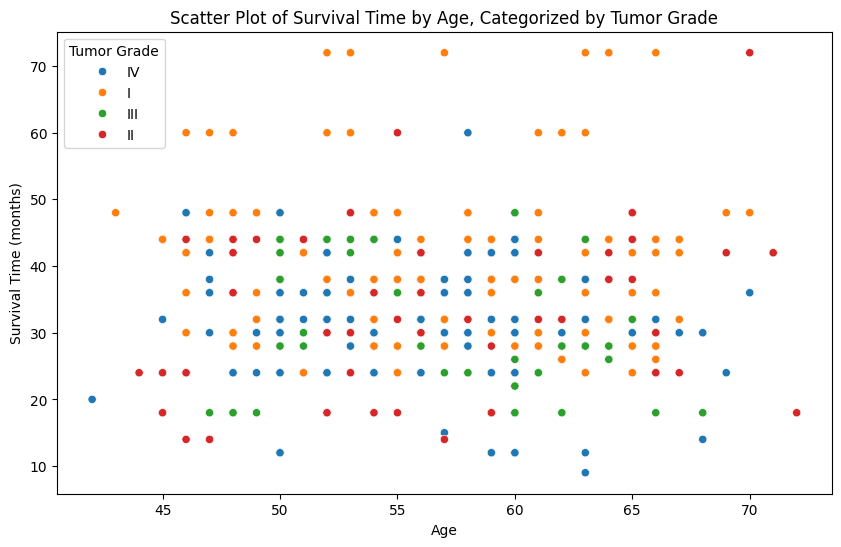

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.scatterplot(x='Age', y='Survival Time (months)', hue='Tumor Grade', data=data)
plt.xlabel('Age')
plt.ylabel('Survival Time (months)')
plt.title('Scatter Plot of Survival Time by Age, Categorized by Tumor Grade')
plt.legend(title='Tumor Grade')
plt.show()

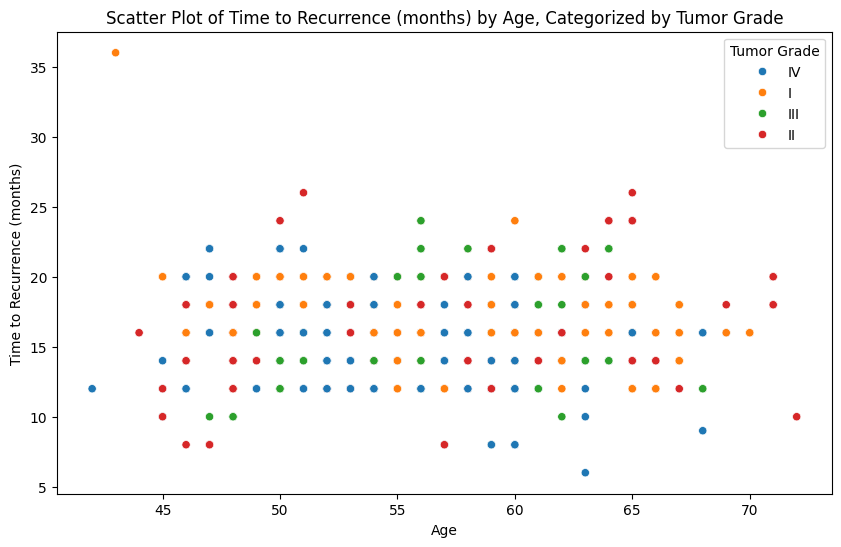

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.scatterplot(x='Age', y='Time to Recurrence (months)', hue='Tumor Grade', data=data)
plt.xlabel('Age')
plt.ylabel('Time to Recurrence (months)')
plt.title('Scatter Plot of Time to Recurrence (months) by Age, Categorized by Tumor Grade')
plt.legend(title='Tumor Grade')
plt.show()

**Compared to Tumor Grade, Age doesn't have much impact on Survival Time and Time to Recurrence.**
**What about Treatment Outcome? Create a mosaic plot.**

<Figure size 1000x600 with 0 Axes>

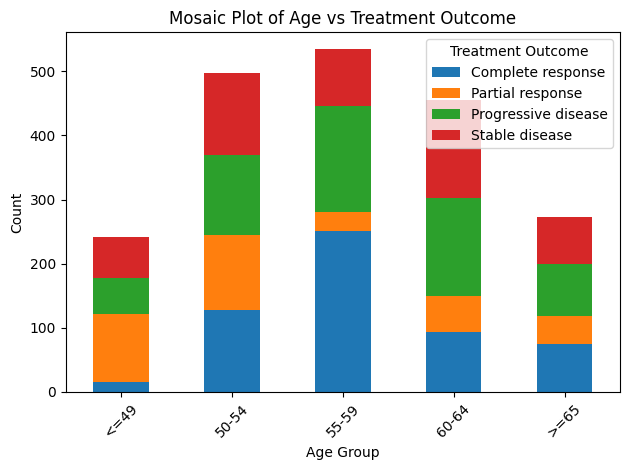

In [ ]:
bins = [0, 49, 54, 59, 64, float('inf')]
labels = ['<=49', '50-54', '55-59', '60-64', '>=65']
data['age_group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Create mosaic plot
plt.figure(figsize=(10, 6))
mosaic_data = data.groupby(['age_group', 'Treatment Outcome']).size().unstack()
mosaic_data.plot(kind='bar', stacked=True)
plt.title('Mosaic Plot of Age vs Treatment Outcome')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Treatment Outcome')
plt.tight_layout()
plt.show()

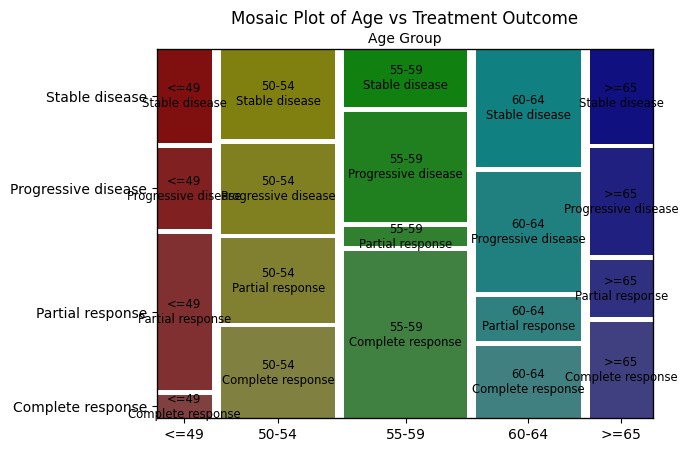

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic_data = data.groupby(['age_group', 'Treatment Outcome']).size().unstack()
mosaic(mosaic_data.stack(), gap=0.02, title='Mosaic Plot of Age vs Treatment Outcome')
plt.xlabel('Age Group')
plt.ylabel('Treatment Outcome')
plt.show()

The mosaic plot reveals the patients under 50 had much worse outcome. Since our dataset is imbalanced in terms of Ages, it may require advanced statistics or machine learning to continue further analysis regarding Ages.
Note: The width of the mosaics correspond to the number of records within each Age Group.

Let's focus on the relationship between Treatment and Treatment Outcome for each Tumor Grade at this stage.

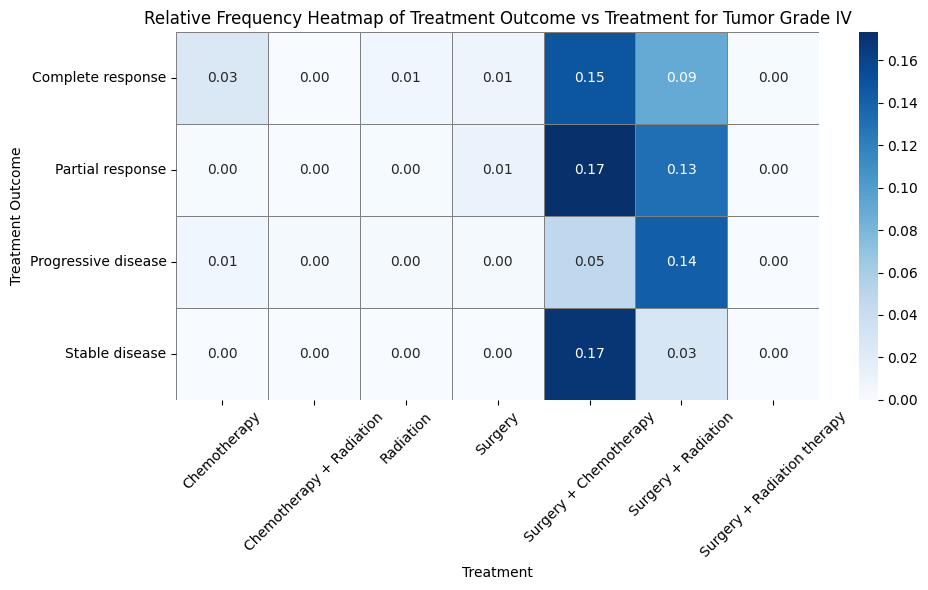

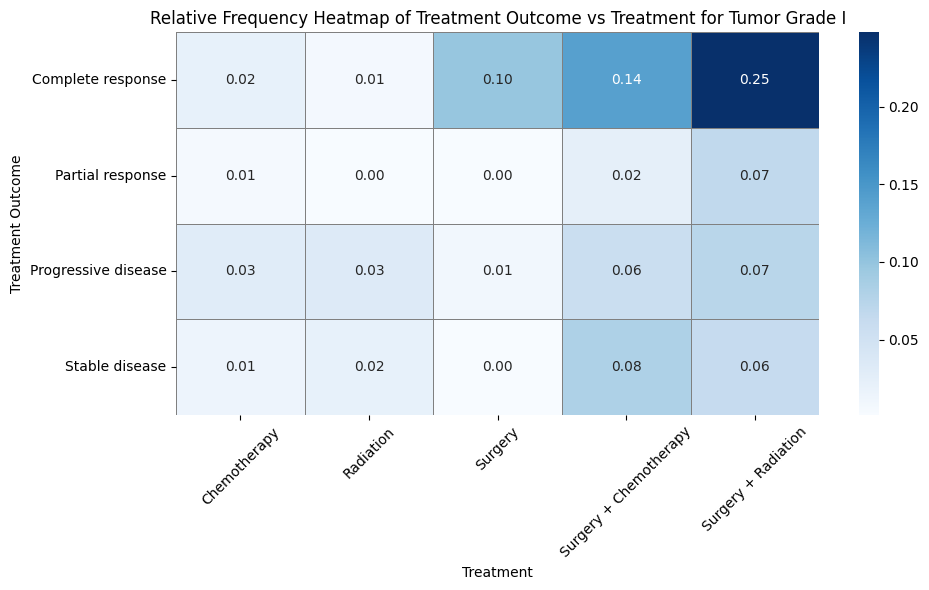

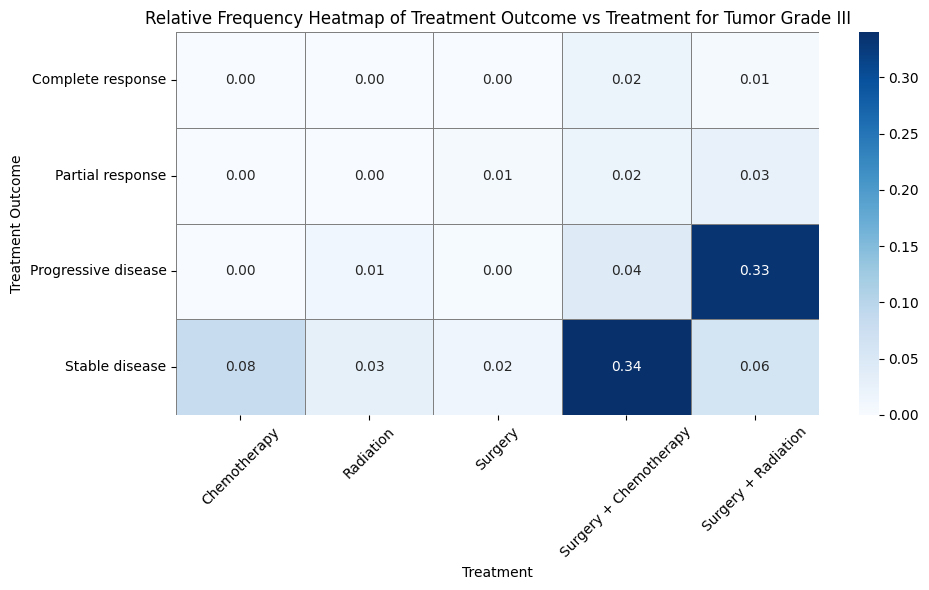

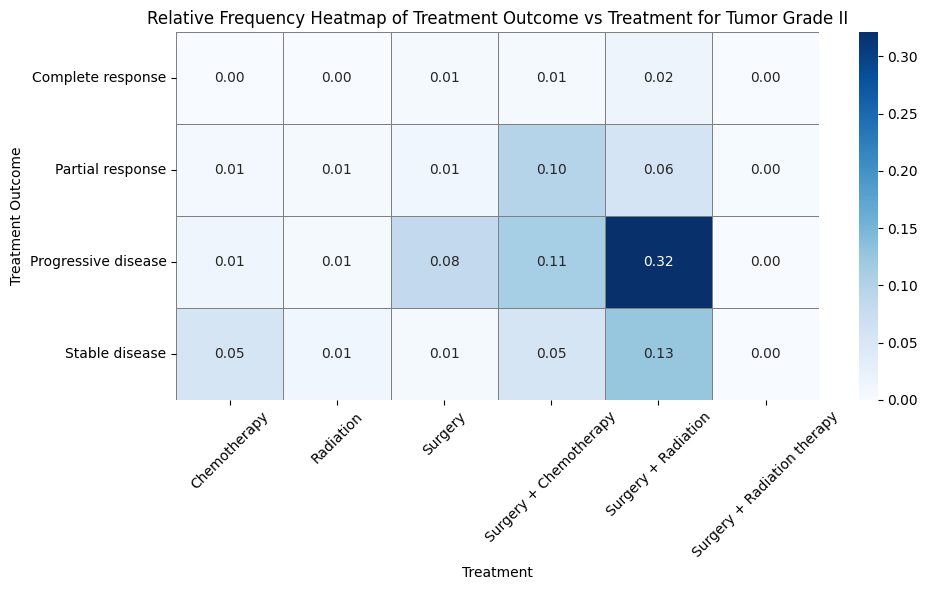

In [ ]:
unique_tumor_grades = df['Tumor Grade'].unique()

# Step 3: Loop through each tumor grade and create a relative frequency heatmap
for grade in unique_tumor_grades:
    # Filter DataFrame for the current tumor grade
    grade_df = df[df['Tumor Grade'] == grade]

    # Create a pivot table with 'Treatment Outcome' as rows, 'Treatment' as columns, and values as count
    pivot_table = grade_df.pivot_table(index='Treatment Outcome', columns='Treatment', aggfunc='size', fill_value=0)

    # Normalize the values to get relative frequencies
    relative_freq_pivot = pivot_table.div(pivot_table.sum().sum())

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(relative_freq_pivot, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, linecolor='grey')
    plt.title(f'Relative Frequency Heatmap of Treatment Outcome vs Treatment for Tumor Grade {grade}')
    plt.xlabel('Treatment')
    plt.ylabel('Treatment Outcome')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

**Is surgery that varsitile, let's check for treatment according to tumor location**

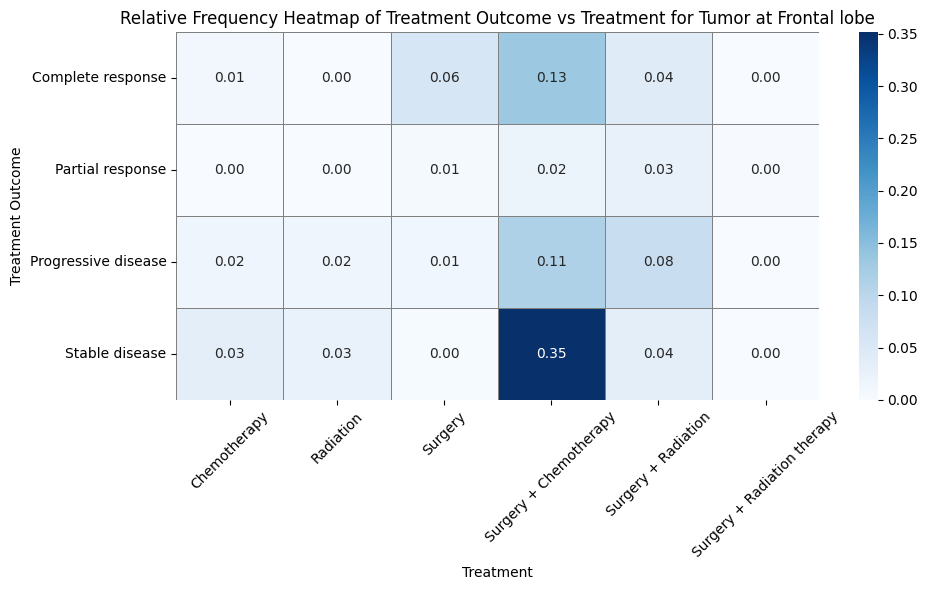

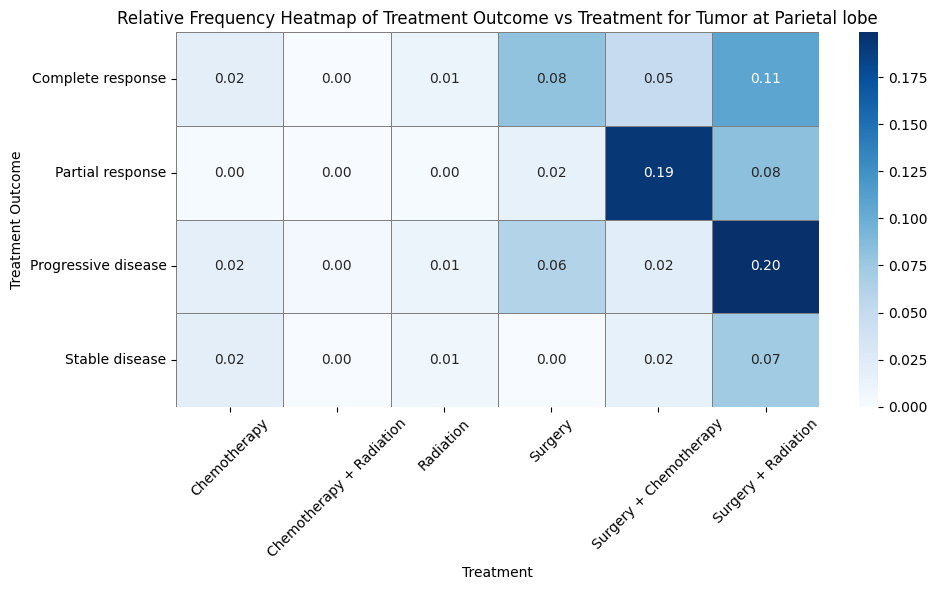

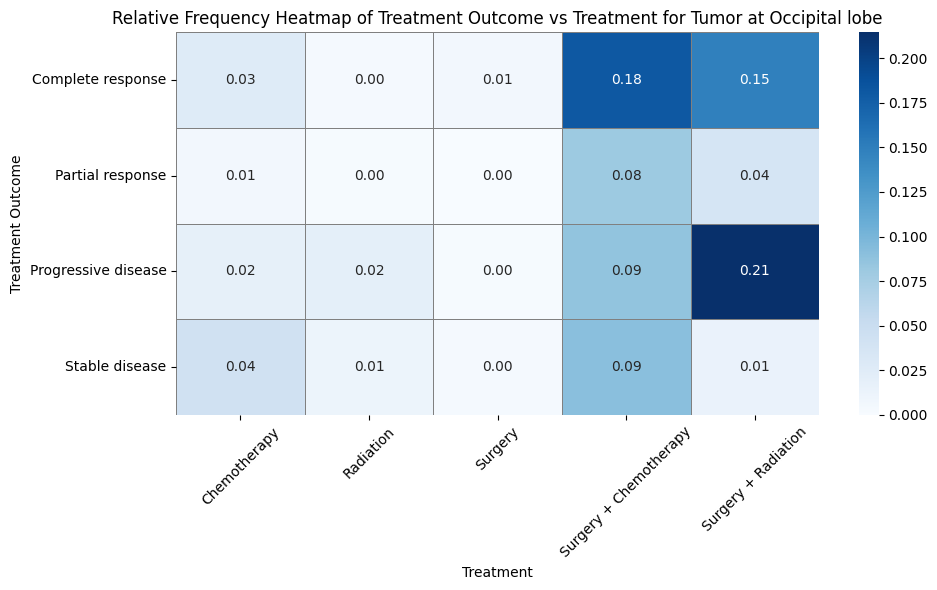

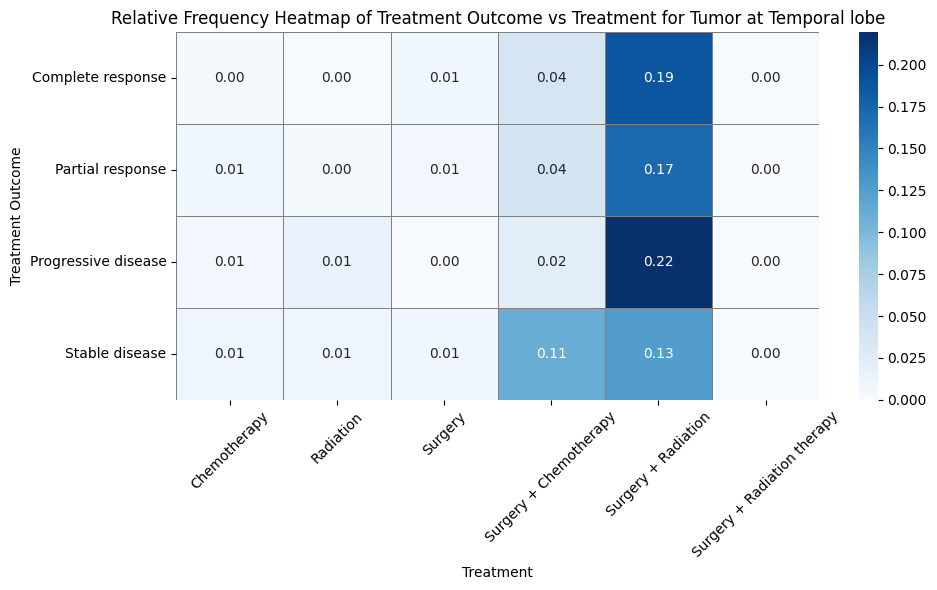

In [ ]:
unique_tumor_locs = df['Tumor Location'].unique()

# Step 3: Loop through each tumor location and create a relative frequency heatmap
for locs in unique_tumor_locs:
    # Filter DataFrame for the current tumor location
    locs_df = df[df['Tumor Location'] == locs]

    # Create a pivot table with 'Treatment Outcome' as rows, 'Treatment' as columns, and values as count
    pivot_table = locs_df.pivot_table(index='Treatment Outcome', columns='Treatment', aggfunc='size', fill_value=0)

    # Normalize the values to get relative frequencies
    relative_freq_pivot = pivot_table.div(pivot_table.sum().sum())

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(relative_freq_pivot, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, linecolor='grey')
    plt.title(f'Relative Frequency Heatmap of Treatment Outcome vs Treatment for Tumor at {locs}')
    plt.xlabel('Treatment')
    plt.ylabel('Treatment Outcome')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()



*   Treatment Outcome is an appropriate feature to evaluate treatment effectiveness as it is highly correlated with Survival Time, Time to Recurrence, and No Recurrence Rate.
*   Within our quick Exploratory Data Analysis, Surgery is generally outperforming other treatments. Exceptions are:(1) Chemotherapy for Grade IV, and (2) Chemotherapy and Radiation for Glioblastoma


*   More complicated analysis is required to reveal patterns relevant to Ages, as our dataset is imbalanced.
*   We need to check if the dataset is biased because Grade III outcomes are significantly worse than Grade IV for some reason. Possible biases include sample selection bias and data collection methods.






.





# **Modeeling**

In [ ]:
!pip install lazypredict

In [ ]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

In [ ]:
from sklearn.model_selection import train_test_split
data['Time to Recurrence (months)'].fillna(data['Time to Recurrence (months)'].median(), inplace=True)
data['Recurrence Site'].fillna('Unknown', inplace=True)

data = pd.get_dummies(data, columns=['Gender', 'Tumor Type', 'Tumor Grade', 'Tumor Location', 'Treatment', 'Treatment Outcome', 'Recurrence Site'])

X = data.drop(columns=['Survival Time (months)', 'Patient ID'])
y = data['Survival Time (months)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

models

100%|██████████| 42/42 [00:05<00:00,  7.37it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 41
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 2
[LightGBM] [Info] Start training from score 34.360000


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.43,0.48,6.31,0.49
BaggingRegressor,0.43,0.48,6.32,0.06
RandomForestRegressor,0.43,0.47,6.33,0.20
XGBRegressor,0.43,0.47,6.33,0.18
ExtraTreeRegressor,0.43,0.47,6.35,0.03
DecisionTreeRegressor,0.43,0.47,6.36,0.02
LGBMRegressor,0.38,0.43,6.60,0.14
HistGradientBoostingRegressor,0.38,0.43,6.60,0.33
KNeighborsRegressor,0.35,0.40,6.75,0.02


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

model = ExtraTreesRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 5,10, 20],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

best_model = grid_search.best_estimator_
best_model_score = best_model.score(X_test, y_test)
print("R-squared score of the best model after tuning:", best_model_score)

KeyboardInterrupt: 

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.ensemble import ExtraTreesRegressor

# Define the search space for hyperparameters
param_space = {
    'n_estimators': Integer(50, 250),
    'max_depth': Integer(1, 20),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 4)
}

# Initialize the ExtraTreesRegressor model
model = ExtraTreesRegressor(random_state=42)

# Initialize the Bayesian optimization search
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=50,  # Number of iterations (try to keep it less than grid search)
    cv=5,       # Number of cross-validation folds
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

# Perform Bayesian optimization
bayes_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = bayes_search.best_params_
print("Best hyperparameters:", best_params)

best_model = bayes_search.best_estimator_
best_model_score = best_model.score(X_test, y_test)
print("R-squared score of the best model after tuning:", best_model_score)


Best hyperparameters: OrderedDict([('max_depth', 17), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 52)])
R-squared score of the best model after tuning: 0.8544316783281153


NameError: name 'X_new' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
rf_best_params = rf_grid_search.best_params_
print("Best hyperparameters for RandomForestRegressor:", rf_best_params)

rf_best_model = rf_grid_search.best_estimator_
rf_best_model_score = rf_best_model.score(X_test, y_test)
print("R-squared score of the best RandomForestRegressor model after tuning:", rf_best_model_score)

Best hyperparameters for RandomForestRegressor: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
R-squared score of the best RandomForestRegressor model after tuning: 0.8315464550276229


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_pred = rf_best_model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the model report
print("Model Report:")
print("R-squared:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Model Report:
R-squared: 0.8315464550276229
Mean Squared Error: 12.851641007678095
Mean Absolute Error: 1.4718124314607894


In [ ]:
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the model report
print("Model Report:")
print("R-squared:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Model Report:
R-squared: 0.8544316783281153
Mean Squared Error: 11.10568384015926
Mean Absolute Error: 1.0334412310127783
